In [92]:
from sklearn import cluster, datasets, mixture

In [93]:
n_samples = 500
seed = 30

In [125]:
import matplotlib.pyplot as plt
import numpy as np

In [126]:
def scatter(X, y, centroid=None):
    # Plot the dataset
    plt.figure(figsize=(6, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, s=10)
    if centroid is not None and isinstance(centroid, np.ndarray) and centroid.size > 0:
        plt.scatter(centroid[:, 0], centroid[:, 1], s=55, marker='x', color='black', linewidths=3)
    plt.title("Noisy Circles Dataset")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

In [127]:
X, y = datasets.make_blobs(n_samples=n_samples, centers=3, n_features=2,
                  random_state=0)

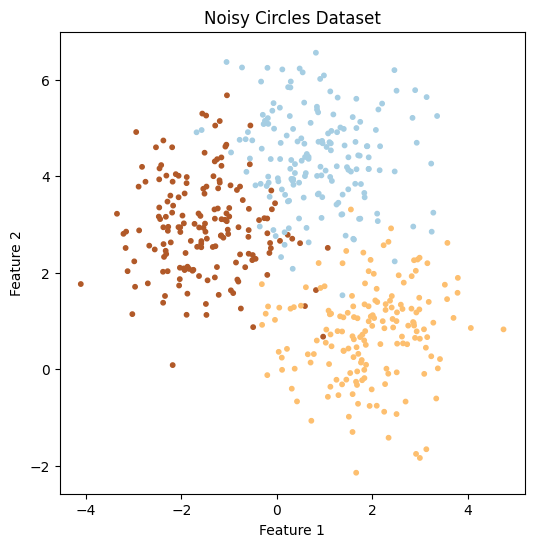

In [128]:
scatter(X, y)

# KMeans

In [129]:
from sklearn.cluster import KMeans

In [130]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
kmeans

KMeans(n_clusters=3)

In [131]:
kmeans.cluster_centers_

array([[ 1.95492734,  0.78302695],
       [-1.51285214,  2.91941194],
       [ 0.85892774,  4.51087968]])

In [132]:
kmeans.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2'], dtype=object)

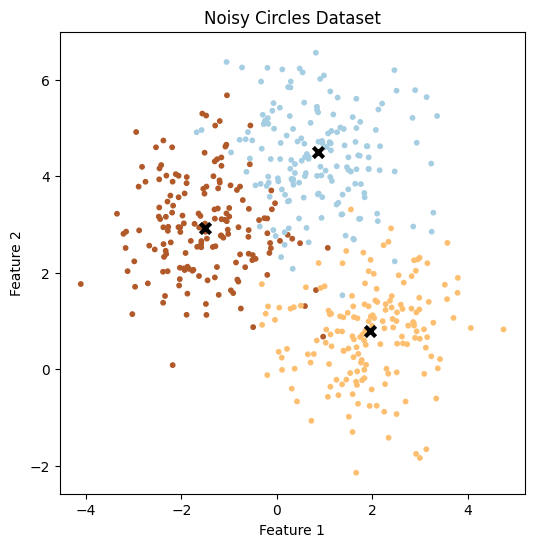

In [133]:
scatter(X, y, kmeans.cluster_centers_)

In [134]:
kmeans.predict([[-2, 2], [2, 1]])

array([1, 0], dtype=int32)

In [135]:
kmeans.cluster_centers_[kmeans.predict([[-2, 2], [2, 1]])]

array([[-1.51285214,  2.91941194],
       [ 1.95492734,  0.78302695]])

In [136]:
kmeans.get_feature_names_out()[kmeans.predict([[-2, 2], [2, 1]])]

array(['kmeans1', 'kmeans0'], dtype=object)

In [137]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [139]:
y_kmeans = kmeans.predict(X)

In [140]:
# Evaluation Metrics
inertia = kmeans.inertia_  # Sum of squared distances to closest centroid
silhouette_avg = silhouette_score(X, y_kmeans)  # Silhouette Score
db_index = davies_bouldin_score(X, y_kmeans)  # Davies-Bouldin Index

In [141]:
print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {db_index}")

Inertia: 881.9706083853744
Silhouette Score: 0.4728303577829582
Davies-Bouldin Index: 0.7486395991648435


**Explanation:**
1. Silhouette Score:

    - Measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
    - Ranges from -1 (incorrect clustering) to +1 (well-clustered), with 0 indicating overlapping clusters.

2. Davies-Bouldin Index:

    - Measures the average similarity ratio of each cluster with the cluster that is most similar to it.
    - A lower Davies-Bouldin index indicates better clustering because it suggests that clusters are well separated and compact.

3. Inertia (within-cluster sum of squares):

    - Measures the total distance between data points and their corresponding cluster centers (centroids).
    - Lower inertia indicates better clustering, as it suggests the clusters are more compact.


# DBSCAN

In DBSCAN (Density-Based Spatial Clustering of Applications with Noise), the concept of boundary points is crucial for understanding how the algorithm groups data into clusters.

**Types of Points in DBSCAN:**

---

1. Core Points:

    - A point is a core point if it has at least min_samples points (including itself) within a distance of eps (the neighborhood radius).
These points form the "dense regions" of a cluster.

2. Boundary Points:  

    - A point is a boundary point if it is within the eps neighborhood of a core point but does not have enough points in its own eps neighborhood to qualify as a core point.
Boundary points "belong" to the cluster of the core point they are close to.

3. Noise Points:  

    - A point is a noise point if it is neither a core point nor a boundary point.
Noise points are often outliers or points that do not belong to any dense region.

In [54]:
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
X, y = noisy_circles

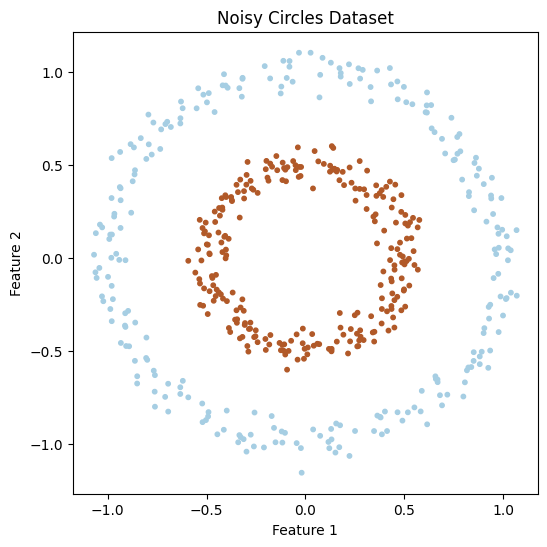

In [58]:
scatter(X, y)

In [59]:
from sklearn.cluster import DBSCAN

In [62]:
dbscan = DBSCAN(eps=.2, min_samples=5)
dbscan = dbscan.fit(X)

In [65]:
labels = dbscan.labels_

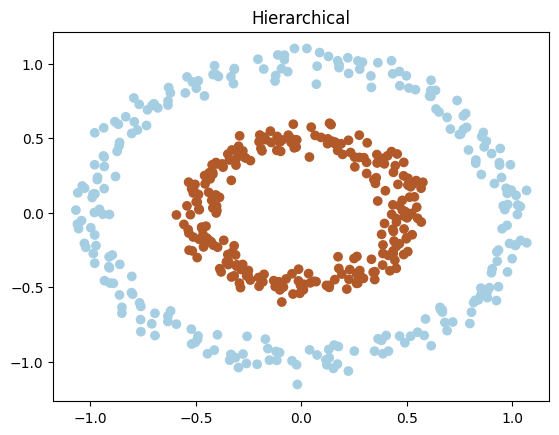

In [72]:
y_pred = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Hierarchical")
plt.show()

# Agglomerative Clustering

Agglomerative Clustering is a hierarchical clustering algorithm, which is widely used for various clustering tasks. It is particularly useful in cases where you need a more flexible and interpretable clustering solution compared to flat clustering methods (like KMeans)

---

1. No Need to Specify the Number of Clusters in Advance:
    - Unlike KMeans, where you must specify the number of clusters (k) beforehand, Agglomerative Clustering does not require you to predefine the number of clusters. It builds a hierarchy of clusters, and you can choose the number of clusters by cutting the tree (dendrogram) at a certain level.
    - This is particularly useful when you don’t know how many clusters to expect or when the optimal number of clusters isn’t obvious.
2. Works Well with Non-Spherical Clusters:
    - KMeans tends to perform poorly when the clusters have irregular shapes or densities because it assumes spherical (or circular) clusters. However, Agglomerative Clustering does not make such assumptions and can work well with data that forms non-spherical or complex-shaped clusters.
    - It can handle situations where clusters are elongated, concave, or have different sizes.
3. Flexible Distance Measures:
    - Agglomerative Clustering allows you to define various types of distances between points (or clusters) through different linkage criteria, such as:
        - Single linkage (minimum distance between clusters)
        - Complete linkage (maximum distance between clusters)
        - Average linkage (average distance between clusters)
        - Ward linkage (minimizing the variance within clusters)
    - This flexibility allows the algorithm to work with different kinds of data and cluster structures.
4. Dendrogram Visualization:
    - Agglomerative Clustering produces a dendrogram, which is a tree-like diagram that shows the hierarchical relationship between clusters. This visualization can be extremely helpful in understanding how data points are grouped and how clusters are formed at various levels.
    - You can visually inspect the dendrogram to determine the most appropriate number of clusters by "cutting" the tree at the desired level.
5. Handles Different Cluster Sizes and Densities:
    - Agglomerative Clustering is often better suited for datasets with varying cluster sizes and densities. Since it progressively merges clusters based on a distance metric, it is more adaptable to datasets where the clusters are not uniform.
6. Use in Real-World Applications:
    - Agglomerative Clustering is commonly used in fields like bioinformatics (for clustering gene expression data), text mining (for hierarchical document clustering), image segmentation, and phylogenetic tree analysis. Its ability to create meaningful clusters without predefining their number makes it valuable in such applications.

---

**When to Use Agglomerative Clustering**

---

- When the data structure is hierarchical: If you have data that naturally forms hierarchical relationships (such as gene expression data or social networks), agglomerative clustering works well. Use Case: Biological taxonomy, where species are grouped into hierarchical levels like genus, family, order, etc.

- When the number of clusters is not known: If you don’t know how many clusters you need beforehand, agglomerative clustering allows you to explore different numbers of clusters by examining the dendrogram.

- When clusters have non-spherical shapes: If you expect the clusters to have irregular shapes, agglomerative clustering can often handle these better than KMeans.

- When you need a detailed clustering hierarchy: If you want to explore the relationships between data points at multiple levels, the dendrogram provided by agglomerative clustering gives a useful visual representation.



In [75]:
from sklearn.cluster import AgglomerativeClustering

In [79]:
X, y = datasets.make_blobs(n_samples=n_samples, centers=3, random_state=42)

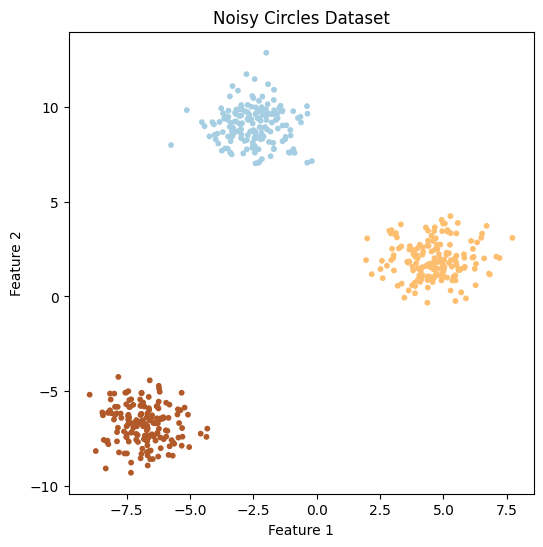

In [80]:
scatter(X, y)

In [81]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
y_pred = agg_clustering.fit_predict(X)

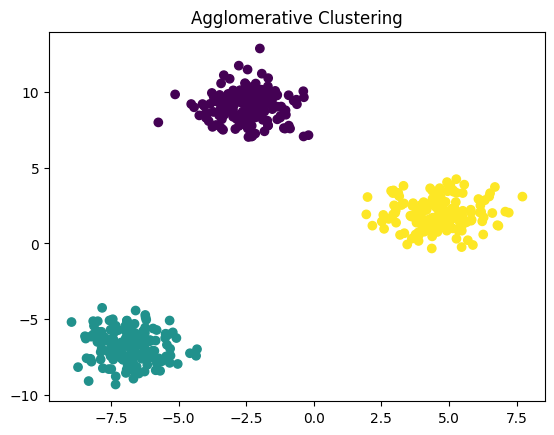

In [82]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [83]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [89]:
X, y = datasets.make_blobs(n_samples=15, centers=3, random_state=42)

**Definition:** Ward linkage aims to minimize the variance within the clusters. It merges the two clusters that result in the smallest increase in the total within-cluster variance after merging.

**How It Works:**  

- Ward linkage measures the sum of squared differences within the cluster (also called the sum of squared errors or SSE).  
    
- When two clusters are merged, Ward linkage computes the total variance within the resulting cluster. The algorithm merges the two clusters whose combination results in the least increase in variance.

---

- Effect: Ward linkage tends to create compact, spherical clusters with low variance. It is often used when you want clusters that are well-separated and tightly packed.

- When to Use: Ward linkage is ideal when you want to minimize the variance within each cluster, and is particularly effective when the data is relatively homogeneous and you want to identify well-separated, dense clusters.

$$
D(A, B) = \frac{|A| + |B|}{|A| |B|} \cdot \| \text{centroid}_A - \text{centroid}_B \|^2
$$

Where:
- \( |A| \) and \( |B| \) are the number of points in clusters \( A \) and \( B \), respectively.
- $\| \text{centroid}_A - \text{centroid}_B \|$ is the Euclidean distance between the centroids of clusters \( A \) and \( B \).

The idea

In [90]:
linked = linkage(X, 'ward')  # 'ward' minimizes the variance within clusters

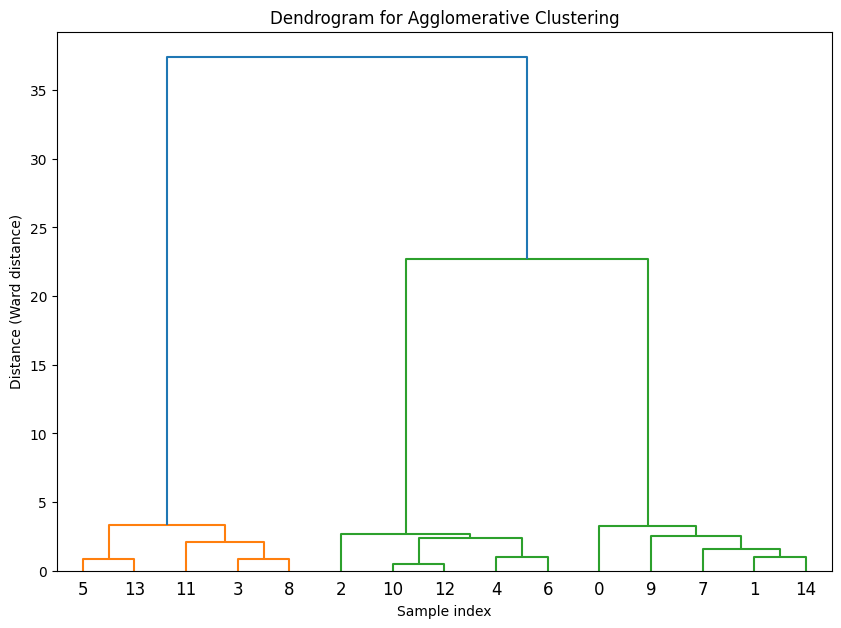

In [91]:
# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)

# Plot formatting
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample index')
plt.ylabel('Distance (Ward distance)')
plt.show()